In [1]:
import numpy as np        
import pandas as pd 
from IPython.display import display
import matplotlib.pyplot as plt  
import seaborn as sns

In [2]:
audit_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/credit_risk/training_set_labels.csv")
pd.options.display.max_columns = None

In [3]:
display(audit_data)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'no checking',18,'critical/other existing credit',radio/tv,1800,'<100','1<=X<4',4,'male single',none,2,car,24,none,own,2,skilled,1,none,yes,good
1,'<0',24,'existing paid',radio/tv,2439,'<100','<1',4,'female div/dep/mar',none,4,'real estate',35,none,own,1,skilled,1,yes,yes,bad
2,'no checking',36,'no credits/all paid',repairs,2613,'<100','1<=X<4',4,'male single',none,2,car,27,none,own,2,skilled,1,none,yes,good
3,'no checking',15,'existing paid',education,4623,'100<=X<500','1<=X<4',3,'male single',none,2,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,bad
4,'<0',21,'existing paid',furniture/equipment,3599,'<100','4<=X<7',1,'female div/dep/mar',none,4,car,26,none,rent,1,'unskilled resident',1,none,yes,good
5,'no checking',12,'critical/other existing credit',furniture/equipment,5801,'no known savings','>=7',2,'male single',none,4,'life insurance',49,none,rent,1,skilled,1,yes,yes,good
6,'<0',18,'existing paid',furniture/equipment,2659,'>=1000','1<=X<4',4,'male single',none,2,car,28,none,own,1,skilled,1,none,yes,good
7,'no checking',48,'existing paid',business,4844,'<100',unemployed,3,'male single',none,2,car,33,bank,rent,1,'high qualif/self emp/mgmt',1,yes,yes,bad
8,'no checking',24,'existing paid','used car',7814,'<100','4<=X<7',3,'male single',none,3,car,38,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
9,'<0',18,'existing paid',furniture/equipment,2462,'<100','1<=X<4',2,'male single',none,2,car,22,none,own,1,skilled,1,none,yes,bad


In [4]:
audit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
checking_status           800 non-null object
duration                  800 non-null int64
credit_history            800 non-null object
purpose                   800 non-null object
credit_amount             800 non-null int64
savings_status            800 non-null object
employment                800 non-null object
installment_commitment    800 non-null int64
personal_status           800 non-null object
other_parties             800 non-null object
residence_since           800 non-null int64
property_magnitude        800 non-null object
age                       800 non-null int64
other_payment_plans       800 non-null object
housing                   800 non-null object
existing_credits          800 non-null int64
job                       800 non-null object
num_dependents            800 non-null int64
own_telephone             800 non-null object
foreign_worker            80

In [5]:
audit_data.checking_status.unique()

array(["'no checking'", "'<0'", "'0<=X<200'", "'>=200'"], dtype=object)

In [6]:
audit_data.foreign_worker.unique()

array(['yes', 'no'], dtype=object)

In [7]:
audit_data.other_payment_plans.unique()

array(['none', 'bank', 'stores'], dtype=object)

In [8]:
audit_data.other_parties.unique()

array(['none', 'guarantor', "'co applicant'"], dtype=object)

In [9]:
audit_data.savings_status.unique()

array(["'<100'", "'100<=X<500'", "'no known savings'", "'>=1000'",
       "'500<=X<1000'"], dtype=object)

In [10]:
audit_data.employment.unique()

array(["'1<=X<4'", "'<1'", "'4<=X<7'", "'>=7'", 'unemployed'],
      dtype=object)

In [11]:
audit_data.own_telephone.unique()

array(['none', 'yes'], dtype=object)

In [12]:
audit_data.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [13]:
audit_data['class'].unique()

array(['good', 'bad'], dtype=object)

In [14]:
audit_data['own_telephone'] = audit_data['own_telephone'].apply(lambda x: 1 if x == 'yes' else 0)

In [15]:
audit_data['foreign_worker'] = audit_data['foreign_worker'].apply(lambda x: 1 if x == 'yes' else 0)

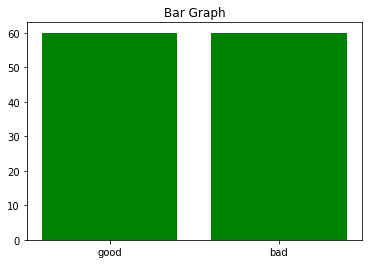

In [19]:
plt.bar(audit_data['class'], audit_data.duration, color="green")
plt.title("Bar Graph")
plt.show()

In [20]:
audit_data = pd.get_dummies(audit_data, columns=['checking_status', 'savings_status', 'employment', 'credit_history', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job'])

In [21]:
audit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 51 columns):
duration                                           800 non-null int64
purpose                                            800 non-null object
credit_amount                                      800 non-null int64
installment_commitment                             800 non-null int64
residence_since                                    800 non-null int64
age                                                800 non-null int64
existing_credits                                   800 non-null int64
num_dependents                                     800 non-null int64
own_telephone                                      800 non-null int64
foreign_worker                                     800 non-null int64
class                                              800 non-null object
checking_status_'0<=X<200'                         800 non-null uint8
checking_status_'<0'                               80

In [28]:
df = audit_data.drop('purpose', axis = 1)

In [29]:
X = df.drop('class', axis = 1)   # her we are droping the class feature as this is the target and 'X' is input features, the changes are not 
                                              # made inplace as we have not used 'inplace = True'

y = df['class']  

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3, random_state = 42)

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [32]:
pred = rfc.predict(X_val)

In [33]:
from sklearn.metrics import accuracy_score
print('Accuracy Score is: ', np.sqrt(accuracy_score(y_val, pred))) 

Accuracy Score is:  0.8539125638299665


In [34]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/credit_risk/testing_set_labels.csv')

In [35]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 20 columns):
checking_status           200 non-null object
duration                  200 non-null int64
credit_history            200 non-null object
purpose                   200 non-null object
credit_amount             200 non-null int64
savings_status            200 non-null object
employment                200 non-null object
installment_commitment    200 non-null int64
personal_status           200 non-null object
other_parties             200 non-null object
residence_since           200 non-null int64
property_magnitude        200 non-null object
age                       200 non-null int64
other_payment_plans       200 non-null object
housing                   200 non-null object
existing_credits          200 non-null int64
job                       200 non-null object
num_dependents            200 non-null int64
own_telephone             200 non-null object
foreign_worker            20

In [36]:
test_data.drop('purpose', axis=1)

,checking_status,duration,credit_history,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,'no checking',18,'existing paid',2662,'no known savings','4<=X<7',4,'male single',none,3,'life insurance',32,none,own,1,skilled,1,none,no
1,'no checking',18,'existing paid',1505,'<100','1<=X<4',4,'male single',none,2,'no known property',32,none,'for free',1,'high qualif/self emp/mgmt',1,yes,yes
2,'no checking',12,'delayed previously',1555,'>=1000','>=7',4,'male single',none,4,'no known property',55,none,'for free',2,skilled,2,none,yes
3,'no checking',15,'existing paid',3186,'>=1000','4<=X<7',2,'female div/dep/mar',none,3,car,20,none,rent,1,skilled,1,none,yes
4,'<0',48,'no credits/all paid',4605,'<100','>=7',3,'male single',none,4,'no known property',24,none,'for free',2,skilled,2,none,yes
5,'0<=X<200',27,'existing paid',2528,'<100','<1',4,'female div/dep/mar',none,1,'life insurance',32,none,own,1,skilled,2,yes,yes
6,'0<=X<200',15,'critical/other existing credit',2326,'500<=X<1000','1<=X<4',2,'male single',none,4,car,27,bank,own,1,skilled,1,none,yes
7,'>=200',12,'delayed previously',2247,'<100','1<=X<4',2,'female div/dep/mar',none,2,car,36,stores,own,2,skilled,1,yes,yes
8,'<0',48,'existing paid',10297,'<100','4<=X<7',4,'male single',none,4,'no known property',39,stores,'for free',3,skilled,2,yes,yes
9,'<0',16,'critical/other existing credit',2625,'<100','>=7',2,'male single',guarantor,4,'life insurance',43,bank,rent,1,skilled,1,yes,yes


In [37]:
test_data['own_telephone'] = test_data['own_telephone'].apply(lambda x: 1 if x == 'yes' else 0) 
test_data['foreign_worker'] = test_data['foreign_worker'].apply(lambda x: 1 if x == 'yes' else 0)

In [38]:
test_data = pd.get_dummies(test_data, columns=['checking_status', 'savings_status', 'employment', 'credit_history', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job'])

In [43]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 50 columns):
duration                                           200 non-null int64
purpose                                            200 non-null object
credit_amount                                      200 non-null int64
installment_commitment                             200 non-null int64
residence_since                                    200 non-null int64
age                                                200 non-null int64
existing_credits                                   200 non-null int64
num_dependents                                     200 non-null int64
own_telephone                                      200 non-null int64
foreign_worker                                     200 non-null int64
checking_status_'0<=X<200'                         200 non-null uint8
checking_status_'<0'                               200 non-null uint8
checking_status_'>=200'                            200

In [44]:
af = test_data.drop('purpose', axis=1)

In [46]:
target = rfc.predict(af)

In [47]:
res = pd.DataFrame(target) #target is nothing but the final predictions of your model on input features of your new unseen test data
res.index = af.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
res.to_csv("submission.csv") 